# Playground for clustering algorithms

Clustering data shape: (300, 2)
No target variable - we discover patterns!


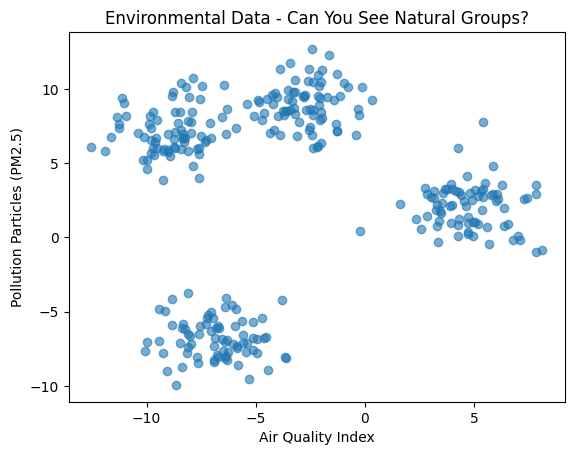

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create sample environmental data
X, _ = make_blobs(
    n_samples=300, centers=4, n_features=2, random_state=42, cluster_std=1.5
)

# In supervised learning, we would have labels (y)
# y = [0, 1, 2, 3, ...]  # Known categories

# In clustering, we only have features (X)
# No labels - we discover groups ourselves
print("Clustering data shape:", X.shape)
print("No target variable - we discover patterns!")

# Visualize the unlabeled data
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
plt.xlabel("Air Quality Index")
plt.ylabel("Pollution Particles (PM2.5)")
plt.title("Environmental Data - Can You See Natural Groups?")
plt.show()

<Figure size 1000x800 with 0 Axes>

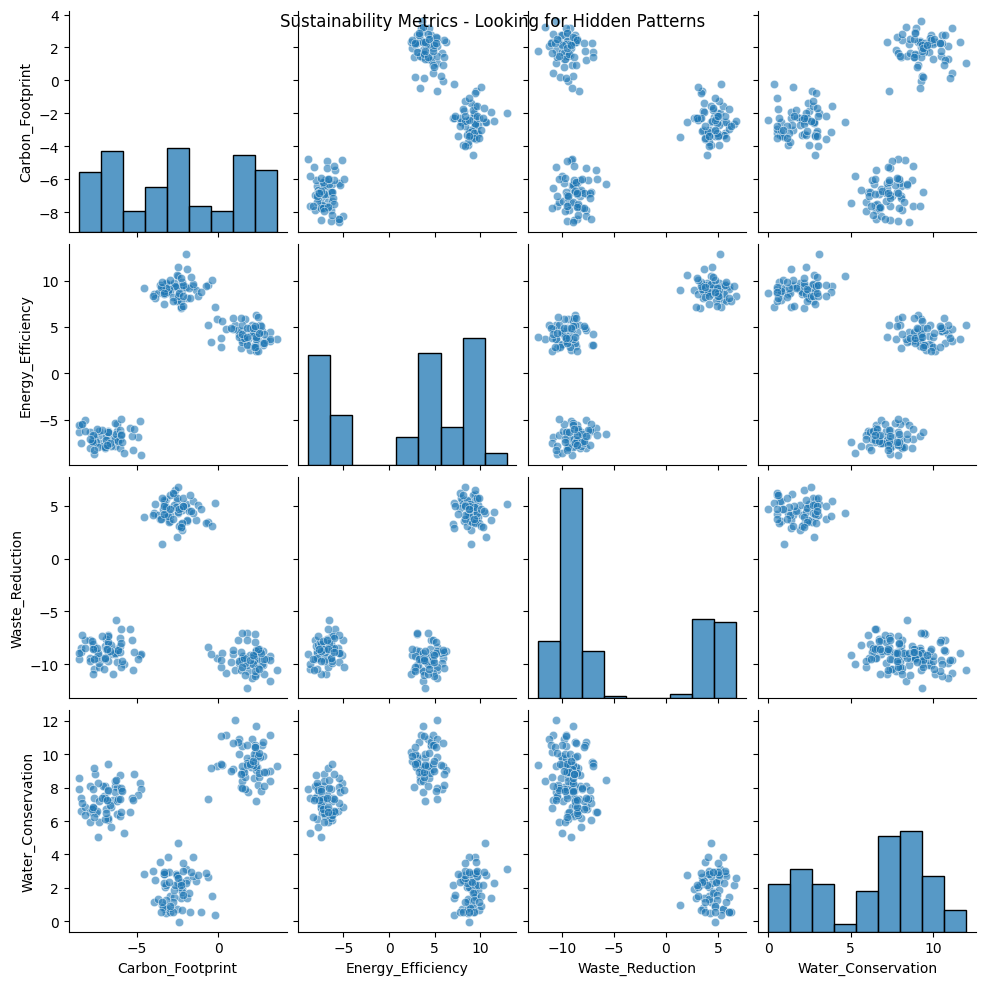

Look for:
- Clusters of points separated from others
- Different distributions in histograms
- Curved or non-linear relationships


In [3]:
# Demonstrating pattern recognition in sustainability data
import seaborn as sns
from sklearn.datasets import make_blobs

# Create multi-dimensional sustainability data
sustainability_data, _ = make_blobs(
    n_samples=200, centers=3, n_features=4, random_state=42
)

# Create a DataFrame with meaningful names
df = pd.DataFrame(
    sustainability_data,
    columns=[
        "Carbon_Footprint",
        "Energy_Efficiency",
        "Waste_Reduction",
        "Water_Conservation",
    ],
)

# Visualize pairwise relationships
plt.figure(figsize=(10, 8))
sns.pairplot(df, diag_kind="hist", plot_kws={"alpha": 0.6})
plt.suptitle("Sustainability Metrics - Looking for Hidden Patterns")
plt.show()

# Can you spot natural groupings in any of these plots?
print("Look for:")
print("- Clusters of points separated from others")
print("- Different distributions in histograms")
print("- Curved or non-linear relationships")

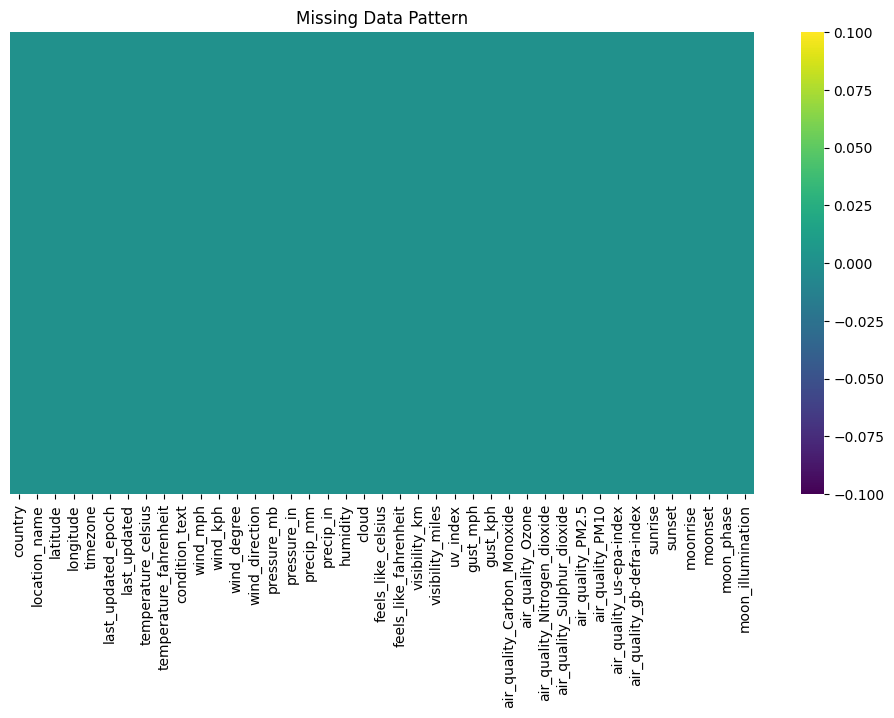

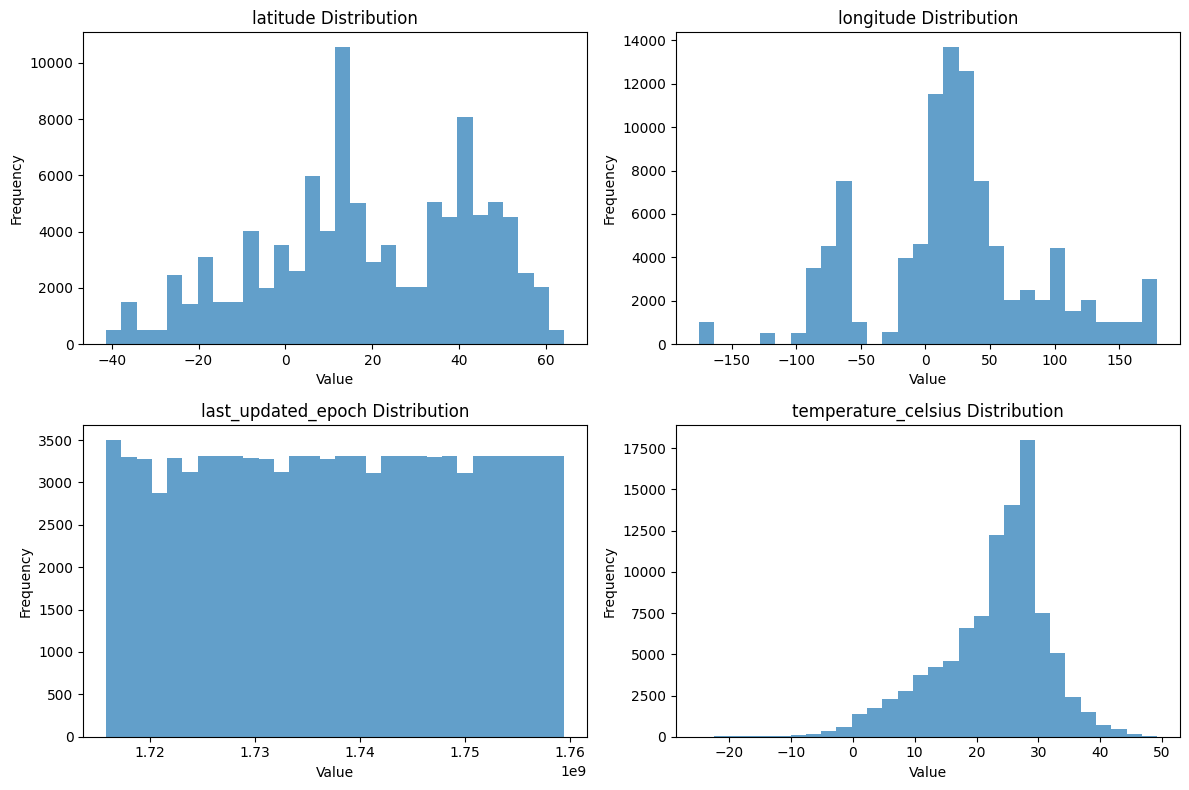

Data Quality Report:

missing_data:
Series([], dtype: int64)

numerical_summary:
           latitude     longitude  last_updated_epoch  temperature_celsius  \
count  98214.000000  98214.000000        9.821400e+04         98214.000000   
mean      19.148049     22.107646        1.737715e+09            22.772745   
std       24.456192     65.818422        1.262162e+07             8.889949   
min      -41.300000   -175.200000        1.715849e+09           -24.900000   
25%        3.750000     -6.836100        1.726829e+09            18.100000   
50%       17.250000     23.316700        1.737716e+09            25.000000   
75%       40.400000     50.580000        1.748681e+09            28.300000   
max       64.150000    179.220000        1.759474e+09            49.200000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            98214.000000  98214.000000  98214.000000  98214.000000   
mean                72.992666      8.232332     13.251953    170.7

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def assess_data_quality(df):
    """Comprehensive data quality assessment"""

    quality_report = {}

    # Completeness analysis
    missing_stats = df.isnull().sum().sort_values(ascending=False)
    quality_report["missing_data"] = missing_stats[missing_stats > 0]

    # Basic statistics for numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    quality_report["numerical_summary"] = df[numerical_cols].describe()

    # Detect potential outliers (simple method)
    outlier_counts = {}
    for col in numerical_cols:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        outliers = ((df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)).sum()
        outlier_counts[col] = outliers
    quality_report["outlier_counts"] = outlier_counts

    return quality_report


def visualize_data_quality(df):
    """Create data quality visualizations"""

    # Missing data heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap="viridis")
    plt.title("Missing Data Pattern")
    plt.show()

    # Distribution plots for numerical variables
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.ravel()

    for i, col in enumerate(numerical_cols[:4]):
        axes[i].hist(df[col].dropna(), bins=30, alpha=0.7)
        axes[i].set_title(f"{col} Distribution")
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


def check_logical_consistency(df):
    """Check for logical inconsistencies in data"""

    issues = []

    # Check for negative values where they shouldn't exist
    for col in df.select_dtypes(include=[np.number]).columns:
        if "income" in col.lower() or "consumption" in col.lower():
            negatives = (df[col] < 0).sum()
            if negatives > 0:
                issues.append(f"{col}: {negatives} negative values")

    # Check percentage columns
    for col in df.columns:
        if "percent" in col.lower() or "rate" in col.lower():
            invalid = ((df[col] < 0) | (df[col] > 100)).sum()
            if invalid > 0:
                issues.append(f"{col}: {invalid} values outside 0-100%")

    return issues


df = pd.read_csv("../data/raw/GlobalWeatherRepository.csv")
data_quality_report = assess_data_quality(df)
visualize_data_quality(df)
logical_issues = check_logical_consistency(df)

print("Data Quality Report:")
for key, value in data_quality_report.items():
    print(f"\n{key}:\n{value}")

if logical_issues:
    print("\nLogical Consistency Issues Found:")
    for issue in logical_issues:
        print(f"- {issue}")

In [5]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import joblib


class SustainabilityPreprocessor:
    """Preprocessing pipeline for sustainability clustering data"""

    def __init__(self, scaling_method="standard", handle_missing="median"):
        self.scaling_method = scaling_method
        self.handle_missing = handle_missing
        self.preprocessor = None
        self.feature_names_ = None

    def build_pipeline(self, numerical_cols, categorical_cols):
        """Build preprocessing pipeline"""

        # Numerical preprocessing
        if self.handle_missing == "median":
            num_imputer = SimpleImputer(strategy="median")
        else:
            num_imputer = SimpleImputer(strategy="mean")

        if self.scaling_method == "standard":
            scaler = StandardScaler()
        elif self.scaling_method == "robust":
            from sklearn.preprocessing import RobustScaler

            scaler = RobustScaler()
        else:
            from sklearn.preprocessing import MinMaxScaler

            scaler = MinMaxScaler()

        numerical_pipeline = Pipeline([("imputer", num_imputer), ("scaler", scaler)])

        # Categorical preprocessing
        categorical_pipeline = Pipeline(
            [
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(drop="first", sparse_output=False)),
            ]
        )

        # Combine pipelines
        self.preprocessor = ColumnTransformer(
            [
                ("num", numerical_pipeline, numerical_cols),
                ("cat", categorical_pipeline, categorical_cols),
            ]
        )

        return self.preprocessor

    def fit_transform(self, df, numerical_cols, categorical_cols):
        """Fit and transform data"""
        pipeline = self.build_pipeline(numerical_cols, categorical_cols)
        transformed_data = pipeline.fit_transform(df)

        # Store feature names
        num_features = numerical_cols
        cat_features = (
            pipeline.named_transformers_["cat"]
            .named_steps["encoder"]
            .get_feature_names_out(categorical_cols)
        )
        self.feature_names_ = list(num_features) + list(cat_features)

        return transformed_data

    def save_pipeline(self, filepath):
        """Save fitted pipeline"""
        joblib.dump(self.preprocessor, filepath)
        print(f"Pipeline saved to {filepath}")

    def load_pipeline(self, filepath):
        """Load fitted pipeline"""
        self.preprocessor = joblib.load(filepath)
        print(f"Pipeline loaded from {filepath}")


def create_sustainability_pipeline(df):
    """Create and test preprocessing pipeline"""

    # Identify column types
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

    print(f"Numerical columns: {len(numerical_cols)}")
    print(f"Categorical columns: {len(categorical_cols)}")

    # Initialize and fit preprocessor
    preprocessor = SustainabilityPreprocessor(
        scaling_method="standard", handle_missing="median"
    )

    transformed_data = preprocessor.fit_transform(df, numerical_cols, categorical_cols)

    print(f"Original shape: {df.shape}")
    print(f"Transformed shape: {transformed_data.shape}")
    print(f"Feature names: {len(preprocessor.feature_names_)}")

    return preprocessor, transformed_data


def validate_pipeline_consistency(preprocessor, df1, df2):
    """Test pipeline consistency across datasets"""

    result1 = preprocessor.preprocessor.transform(df1)
    result2 = preprocessor.preprocessor.transform(df2)

    print(f"Dataset 1 shape: {result1.shape}")
    print(f"Dataset 2 shape: {result2.shape}")
    print(f"Feature consistency: {result1.shape[1] == result2.shape[1]}")

    return result1, result2


df = pd.read_csv("../data/raw/GlobalWeatherRepository.csv")
preprocessor, transformed_data = create_sustainability_pipeline(df)
validate_pipeline_consistency(preprocessor, df, df)

Numerical columns: 30
Categorical columns: 11
Original shape: (98214, 41)
Transformed shape: (98214, 21320)
Feature names: 21320
Dataset 1 shape: (98214, 21320)
Dataset 2 shape: (98214, 21320)
Feature consistency: True


(array([[ 0.62855369,  0.71518874, -1.73239872, ...,  0.        ,
          0.        ,  1.        ],
        [ 0.90701219, -0.0347571 , -1.73239872, ...,  0.        ,
          0.        ,  1.        ],
        [ 0.7201465 , -0.28955029, -1.73239872, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [-0.15510869,  0.3357596 ,  1.72397519, ...,  0.        ,
          0.        ,  1.        ],
        [-1.41334042,  0.09382914,  1.72397519, ...,  0.        ,
          0.        ,  1.        ],
        [-1.51152055,  0.13578417,  1.72397519, ...,  0.        ,
          0.        ,  1.        ]], shape=(98214, 21320)),
 array([[ 0.62855369,  0.71518874, -1.73239872, ...,  0.        ,
          0.        ,  1.        ],
        [ 0.90701219, -0.0347571 , -1.73239872, ...,  0.        ,
          0.        ,  1.        ],
        [ 0.7201465 , -0.28955029, -1.73239872, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [-0.15510869,  0.3357596

In [7]:
def evaluate_dataset_fitness(dataset_url, objectives):
    """Quick fitness assessment for dataset discovery"""
    try:
        df = pd.read_csv(dataset_url)  # Sample first 100 rows

        fitness_indicators = {
            "sample_size_adequate": len(df) > 200,
            "feature_richness": len(df.columns) > 5,
            "missing_data_acceptable": df.isnull().sum().sum() / df.size < 0.3,
        }

        return fitness_indicators
    except:
        return {"accessible": False}


evaluate_dataset_fitness("../data/raw/GlobalWeatherRepository.csv", None)

{'sample_size_adequate': True,
 'feature_richness': True,
 'missing_data_acceptable': np.True_}

In [ ]:
def comprehensive_quality_assessment(df):
    """Systematic dataset quality evaluation"""

    quality_metrics = {
        "completeness": 1 - df.isnull().sum().sum() / df.size,
        "feature_variation": df.select_dtypes(include=["number"]).std().mean(),
        "sample_adequacy": len(df) > 200,
        "temporal_span": assess_temporal_coverage(df) if "date" in df.columns else None,
    }

    # Generate quality score
    quality_score = (
        quality_metrics["completeness"] * 0.3
        + min(1, quality_metrics["feature_variation"]) * 0.3
        + int(quality_metrics["sample_adequacy"]) * 0.4
    )

    return quality_metrics, quality_score


quality_metrics, quality_score = comprehensive_quality_assessment(df)

print("Quality Metrics:", quality_metrics)
print("Quality Score:", quality_score)

Quality Metrics: {'completeness': np.float64(1.0), 'feature_variation': np.float64(420772.3041887082), 'sample_adequacy': True, 'temporal_span': None}
Quality Score: 1.0
